<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.metrics import accuracy_score
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


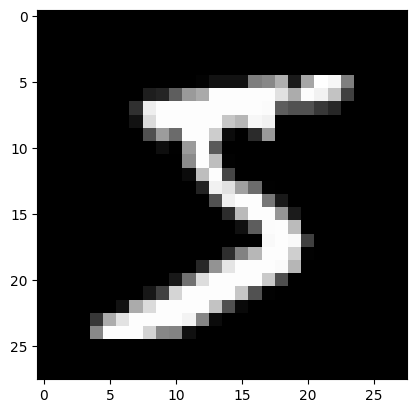

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="gray", interpolation="nearest")

In [3]:
#print(X_train[0])

In [4]:
X_train.shape

(60000, 28, 28)

In [6]:
# Reshape data to fit CNN input format
X_train = X_train / 255.0
X_test = X_test / 255.0
#x_train[0]

In [7]:
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#y_train

In [8]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
# Make sure X_train is 4D (i.e., has a channel dimension)
if X_train.ndim == 3:
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]


In [11]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


In [12]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_mnist_model.h5", save_best_only=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7647 - loss: 0.7074

750/750 ━━━━━━━━━━━━━━━━━━━━ 71s 92ms/step - accuracy: 0.7649 - loss: 0.7070 - val_accuracy: 0.9836 - val_loss: 0.0469
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9527 - loss: 0.1512

750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 90ms/step - accuracy: 0.9527 - loss: 0.1512 - val_accuracy: 0.9889 - val_loss: 0.0349
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9677 - loss: 0.1046

750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9677 - loss: 0.1046 - val_accuracy: 0.9904 - val_loss: 0.0281
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9727 - loss: 0.0906

750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 85ms/step - accuracy: 0.9727 - loss: 0.0906 - val_accuracy: 0.9910 - val_loss: 0.0251
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.9738 - loss: 0.0852 - val_accuracy: 0.9919 - val_loss: 0.0251
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9772 - loss: 0.0733

750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.9772 - loss: 0.0733 - val_accuracy: 0.9928 - val_loss: 0.0223
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.9786 - loss: 0.0695 - val_accuracy: 0.9930 - val_loss: 0.0237
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9925 - val_loss: 0.0226
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9804 - loss: 0.0641

750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.9805 - loss: 0.0641 - val_accuracy: 0.9949 - val_loss: 0.0175
Epoch 10/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 67s 89ms/step - accuracy: 0.9837 - loss: 0.0548 - val_accuracy: 0.9946 - val_loss: 0.0184
Epoch 11/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9842 - loss: 0.0566

750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.9842 - loss: 0.0566 - val_accuracy: 0.9946 - val_loss: 0.0165
Epoch 12/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 85ms/step - accuracy: 0.9822 - loss: 0.0556 - val_accuracy: 0.9937 - val_loss: 0.0183
Epoch 13/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9851 - loss: 0.0459 - val_accuracy: 0.9936 - val_loss: 0.0197
Epoch 14/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9851 - loss: 0.0492 - val_accuracy: 0.9923 - val_loss: 0.0243
Epoch 15/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9933 - val_loss: 0.0186
Epoch 16/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.9857 - loss: 0.0479 - val_accuracy: 0.9940 - val_loss: 0.0181


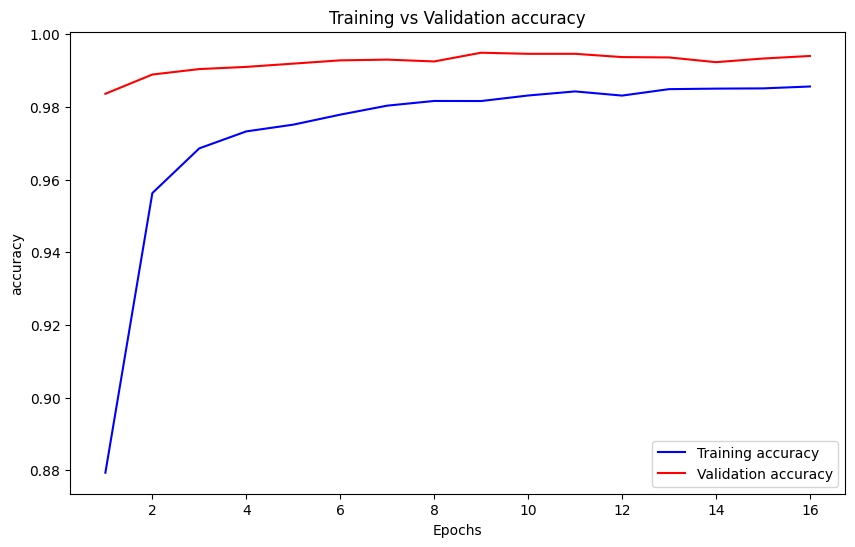

In [15]:
plt.figure(figsize=(10, 6))
epochs_range = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs_range, history.history['accuracy'], label="Training accuracy", color='blue')
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation accuracy", color='red')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Training vs Validation accuracy")
plt.legend()
plt.show()

In [17]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9946


In [18]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class index with the highest probability
y_test_classes = np.argmax(y_test, axis=1)  # Get the class index with the highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [19]:
accuracy_score=(accuracy_score(y_test_classes, y_pred_classes))
print(f"Test Accuracy: {accuracy_score:.4f}")

Test Accuracy: 0.9946
